## 1. Importing All the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Reading the Dataset

In [2]:
pd.options.display.max_columns

#### Converting Date(Objects) to Date(Datetime) and loading the dataset

date_values = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')

dfs = pd.read_csv("co2emmision.csv", parse_dates=['YYYYMM'], date_parser=date_values) 
dfs.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
dfs.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
dfs.tail()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
5089,TXEIEUS,2016-03-01,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,2016-04-01,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,2016-05-01,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,2016-06-01,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5093,TXEIEUS,2016-07-01,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


## 3. Data Preprocessing

In [5]:
dfs.describe(include="all")

,MSN,YYYYMM,Value,Column_Order,Description,Unit
count,5094,4707,5094,5094.000000,5094,5094
unique,9,523,3602,NaN,9,1
top,NNEIEUS,1992-11-01 00:00:00,Not Available,NaN,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
freq,566,9,416,NaN,566,5094
first,NaN,1973-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2016-07-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.000000,NaN,NaN
std,NaN,NaN,NaN,2.582242,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN


In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           5094 non-null   object        
 1   YYYYMM        4707 non-null   datetime64[ns]
 2   Value         5094 non-null   object        
 3   Column_Order  5094 non-null   int64         
 4   Description   5094 non-null   object        
 5   Unit          5094 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 238.9+ KB


### 3.1 Checking for Nan Values

In [7]:
dfs.isnull().sum()

MSN               0
YYYYMM          387
Value             0
Column_Order      0
Description       0
Unit              0
dtype: int64

##### There is 387 Null values in the data

In [8]:
dfs.dropna(inplace=True)

In [9]:
#Since we have removed the null values thats why we need to reset the index
dfs.reset_index(drop=True,inplace=True)

In [10]:
###Since the datatypes of both columns are incorrect,
dfs.dtypes


MSN                     object
YYYYMM          datetime64[ns]
Value                   object
Column_Order             int64
Description             object
Unit                    object
dtype: object

In [11]:
#Why we are getting object in value column, there must be a reason that some text is there is the values columns.
dfs["Value"].value_counts(ascending=False)

Not Available    384
0.032             89
0.031             60
0.034             55
0.033             47
                ... 
2.232              1
1.293              1
163.182            1
157.083            1
147.23             1
Name: Value, Length: 3284, dtype: int64

In [12]:
dfs.isnull().sum()

MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

### 3.2 Handling Datatypes

In [13]:
dfs["Value"]=pd.to_numeric(dfs["Value"], errors="coerce")

In [14]:
dfs["Value"]=dfs["Value"].astype("float")

In [15]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           4707 non-null   object        
 1   YYYYMM        4707 non-null   datetime64[ns]
 2   Value         4323 non-null   float64       
 3   Column_Order  4707 non-null   int64         
 4   Description   4707 non-null   object        
 5   Unit          4707 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 220.8+ KB


In [16]:
#As we can see there are 4323 values are in the value columns, need to remove the null values in it
dfs.dropna(inplace=True)

In [17]:
dfs.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


##### Now we are ready to go for visualization

### 3.4 Visualizing the plot trends

#The following dataset has 8 energy sources of CO2 emission. In the following cell, we will group the CO2 Emission dataset based on the type of energy source.

In [18]:
source= dfs.groupby("Description" )
source.head()


,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
523,NNEIEUS,1973-01-01,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
524,NNEIEUS,1973-02-01,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
525,NNEIEUS,1973-03-01,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
526,NNEIEUS,1973-04-01,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
527,NNEIEUS,1973-05-01,17.344,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [19]:
sources= pd.DataFrame(source)
sources.reset_index(drop=True, inplace=True)

In [20]:
df= dfs.drop(["MSN","Unit","Column_Order"], axis=1)

In [21]:
df.set_index("YYYYMM", drop=True, inplace=True)

In [22]:
df.head()

,Value,Description
YYYYMM,,
1973-01-01,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,61.798,Coal Electric Power Sector CO2 Emissions


In [23]:
desc_value= df.groupby("Description")['Value'].sum().sort_values(ascending=False)

In [24]:
desc_value.index

Index(['Total Energy Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [25]:
co2_category= pd.DataFrame(desc_value)


<AxesSubplot:xlabel='Value', ylabel='Description'>

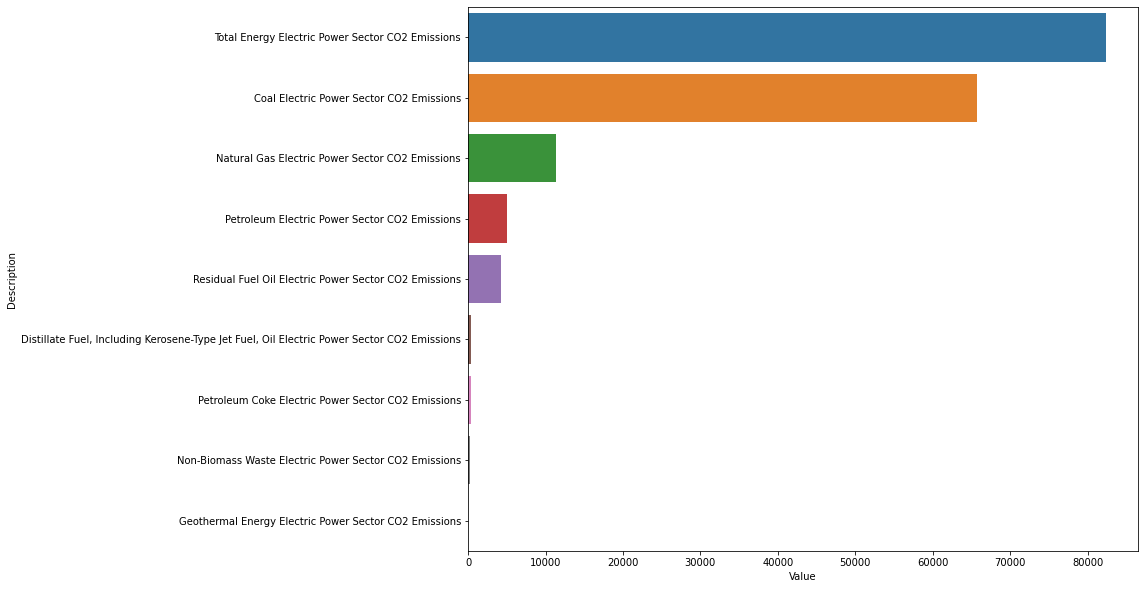

In [26]:
plt.figure(figsize=(12,10))
sns.barplot(y= co2_category.index, x= co2_category["Value"])

#### From the bar chart,we can clearly see the distribution of coal to the co2-emission.

## 4 Coal Electric power sector CO2 Emmission Analysis

In order to develop the time series forecasting model, I am going to use coal electric power sector co2 emission from the electric power generation.

In [28]:
coal_df= df[df["Description"]=="Coal Electric Power Sector CO2 Emissions"]

In [29]:
coal_dff= coal_df["Value"]
df_coal=pd.DataFrame(coal_dff)
df_coal.columns= [[ "Value"]]

In [30]:
df_coal.head()

,Value
YYYYMM,
1973-01-01,72.076
1973-02-01,64.442
1973-03-01,64.084
1973-04-01,60.842
1973-05-01,61.798


#### 4.1 Visualizing the coal electric power sector 

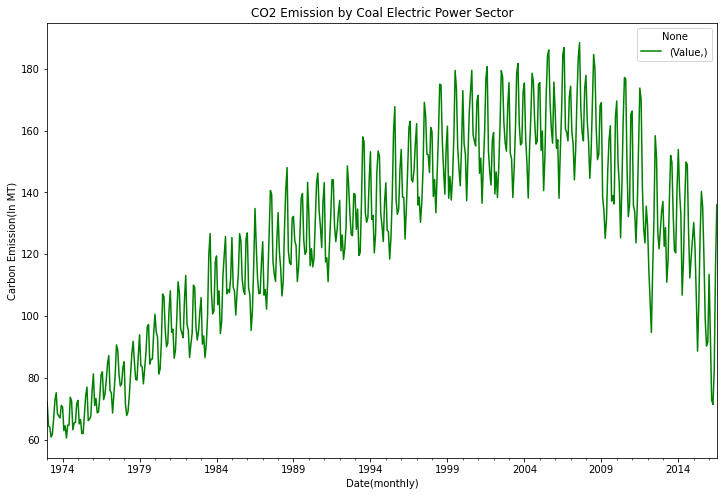

In [31]:
df_coal.plot(figsize=(12,8), color='green')
plt.xlabel("Date(monthly)")
plt.ylabel("Carbon Emission(In MT)")
plt.title("CO2 Emission by Coal Electric Power Sector")
plt.show()
plt.close()

 Inference:-    
##### Stationarity:-
- 1) From the graph, clearly, is trend is not stationary because the mean and variances are increasing gradually, after  2004, it is decreasing. 
- 2) The Graph shows the seasonality.

## 5. Checking For Stationarity

In [187]:
#In order to check the stationarity, we will be using dicky-fuller test by adfuller
from statsmodels.tsa.stattools import adfuller

In [33]:
def adfuller_test(data):
    results= adfuller(data)
    label= ["ADF Statistic value","p-value", "#Lag-used", "Number of Observation"]
    for value, label in zip(results,label):
        print(label+" : "+ str(value))
    if results[1]<0.05:
        print("A weak evidence against null hyposthesis, hence rejecting the null hypothesis and accepting the alternate hypothesis. The data is stationary")
    else:
        print("Rejecting the Alternate Hypothesis, and accepting the null hypothesis. The Data is Not Stationary.")

In [34]:
adfuller_test(df_coal)

ADF Statistic value : -1.8276309255572165
p-value : 0.3668325356566916
#Lag-used : 14
Number of Observation : 508
Rejecting the Alternate Hypothesis, and accepting the null hypothesis. The Data is Not Stationary.


The emissions mean and the variation in standard deviation (black line) clearly vary with time. This shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels. Hence, no evidence to reject the null hypothesis. Therefore the series is nonstationary.
we have to perform differencing.

### 5.1 Differencing

##### The most common techniques used to estimate or model trend and then remove it from the time series are

- Aggregation – taking average for a time period like monthly/weekly average
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

In this technique, we take average of ‘k’ consecutive values depending on the frequency of time series (in this case 12 monthes per year). Here, we will take the average over the past 1 year.

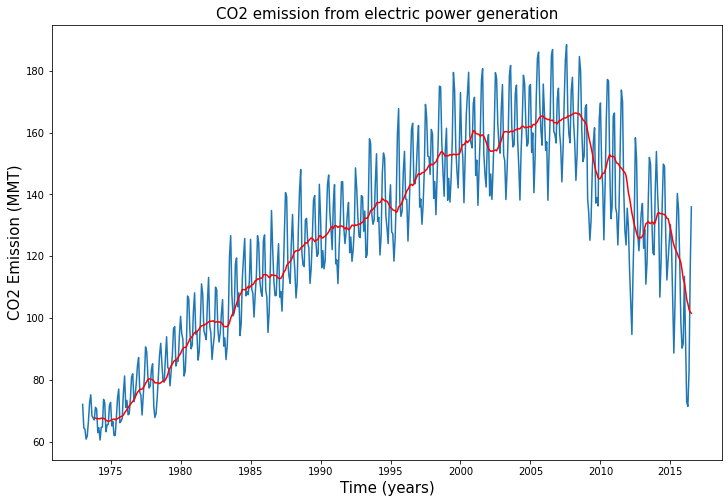

In [155]:
moving_avg = df_coal.rolling(12).mean()
plt.figure(figsize=(12,8))
plt.plot(df_coal)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 15)
plt.ylabel('CO2 Emission (MMT)', fontsize = 15)
plt.title('CO2 emission from electric power generation', fontsize = 15)
plt.show()

#here the red line shows the rolling mean of co2 emission (MMT). Now we can see the data looks seasonal and has a increasing trends, so we can do the differencing here.

In [156]:
df_ma= df_coal-moving_avg

In [157]:
df_ma.head(15)

,Value
YYYYMM,
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN
1973-06-01,NaN
1973-07-01,NaN
1973-08-01,NaN
1973-09-01,NaN


In [158]:
#Removing the NaN values to prevent any obstacle, 
df_ma.dropna(inplace=True)

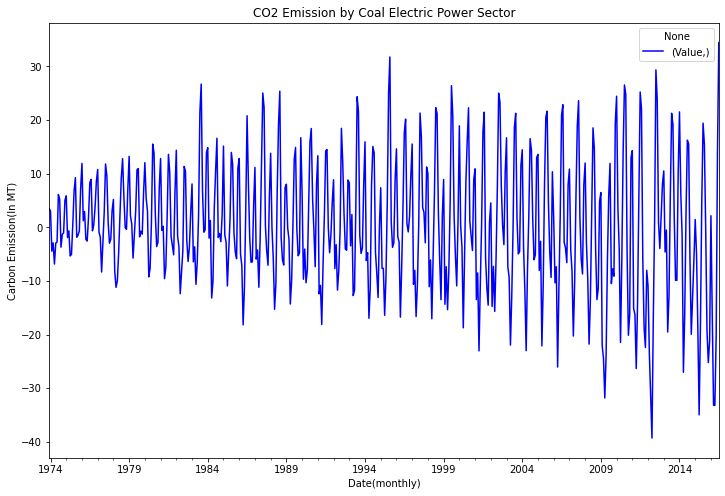

In [159]:
### Lets check it after 12 moving averages whether we will get the stationary data or not
df_ma.plot(figsize=(12,8), color="blue")
plt.xlabel("Date(monthly)")
plt.ylabel("Carbon Emission(In MT)")
plt.title("CO2 Emission by Coal Electric Power Sector")
plt.show()
plt.close()

In [160]:
#taking the new data and check if the data is staionary or not 
adfuller_test(df_ma)

ADF Statistic value : -5.985418932683853
p-value : 1.797036297198569e-07
#Lag-used : 14
Number of Observation : 497
A weak evidence against null hyposthesis, hence rejecting the null hypothesis and accepting the alternate hypothesis. The data is stationary


#After changing differencing from 9 to 12, I found the 9 is the best differencing for a data to be staionary.

#### Now we know that, our data is stationary, the next is to calculate p,d,q for our ARIMA model. 
- p= Autoregressive value
- d= Number of differencing performed
- q= Moving Averages

### 5.2 Eliminating trend and seasonality: Decomposing

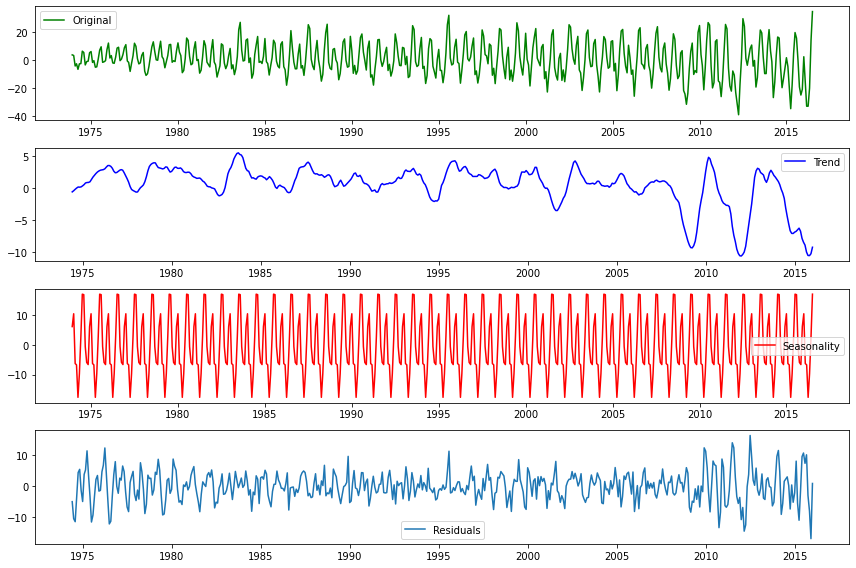

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_ma)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_ma, label='Original', color="green")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="red")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

### 6. AutoRegressive Model

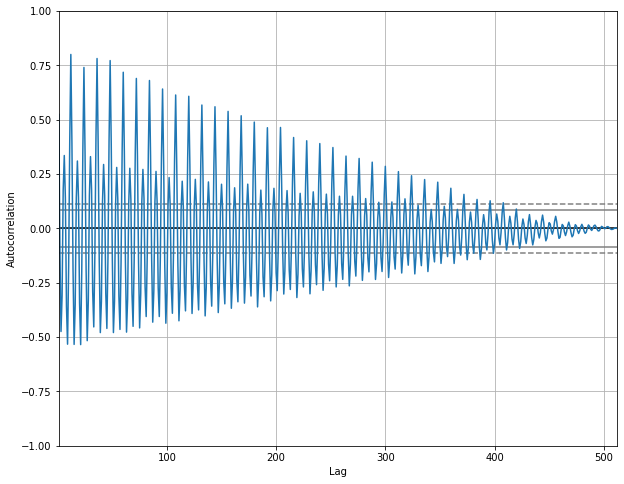

In [162]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,8))
autocorrelation_plot(df_ma)
plt.show()

## 7. Plotting the ACF and PACF- Finding the optimal parameter

##### Autocorrelation Function (ACF): 
- It is a measure of the correlation between the the time series (ts) with a lagged version of itself. For instance at lag 4, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-4’…’t2-4’ (t1-4 and t2 being end points of the range).
##### Partial Autocorrelation Function (PACF): 
- This measures the correlation between the ts with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 4, it will check the correlation but remove the effects already explained by lags 1 to 3.
Therefore, the next step will be determing the tuning parameters (p and q) of the model by looking at the autocorrelation and partial autocorrelation graphs. The chart below provides a brief guide on how to read the autocorrelation and partial autocorrelation graphs inorder to select the parameters.

In [163]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

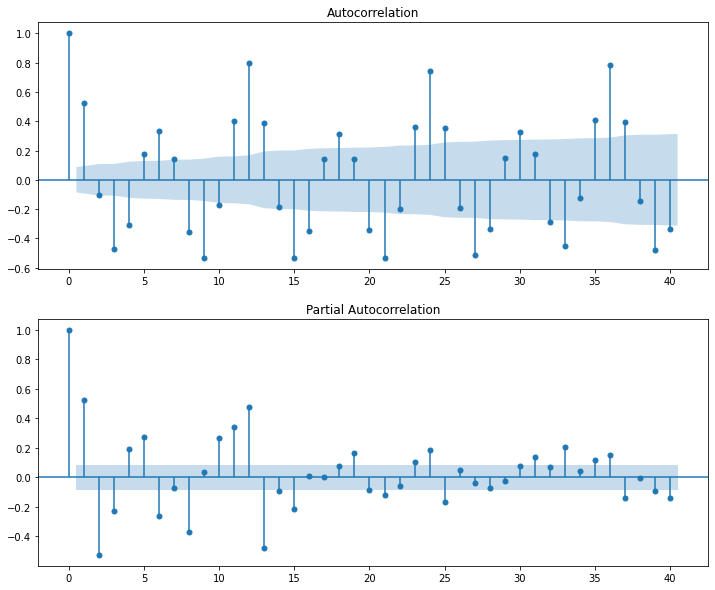

In [165]:
fig= plt.figure(figsize=(12,10))
ax1= fig.add_subplot(211)
fig=  plot_acf(df_ma,lags= 40, ax= ax1 )
ax2= fig.add_subplot(212)
ax2=  plot_pacf(df_ma, lags=40, ax=ax2)

- The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (q, d ,q, seasonal_difference) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

## 8.  ARIMA Model

In [166]:
import statsmodels.api as sm

#For Non-seasonal data
#p=1, d=1, q=1
df_ma.dropna(inplace=True)
from statsmodels.tsa.arima_model import ARIMA

In [167]:
model= ARIMA(df_ma["Value"], order=(2,1,2))
model_arima= model.fit()

C:\Users\Sonal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sonal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [168]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  511
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1823.462
Method:                       css-mle   S.D. of innovations              8.539
Date:                Wed, 16 Feb 2022   AIC                           3658.924
Time:                        21:19:21   BIC                           3684.343
Sample:                    01-01-1974   HQIC                          3668.889
                         - 07-01-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0114      0.005     -2.251      0.024      -0.021      -0.001
ar.L1.D.Value     0.9769      0.049     19.840      0.000       0.880       1.073
ar.L2.D.Value    -0.6421      0.038    -17.006      0.000      -0.716      -0.568
ma.L1.D.Value    -1.2381      0.055    -22.397      0.000      -1.346      -1.130
ma.L2.D.Value     0.2446      0.055      4.420      0.000       0.136       0.353
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7607           -0.9893j            1.2480           -0.1457
AR.2            0.7607           +0.9893j            1.2480            0.1457
MA.1            1.0088           +0.0000j            1.0088            0.0000
MA.2            4.0520           +0.0000j            4.0520            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='YYYYMM'>

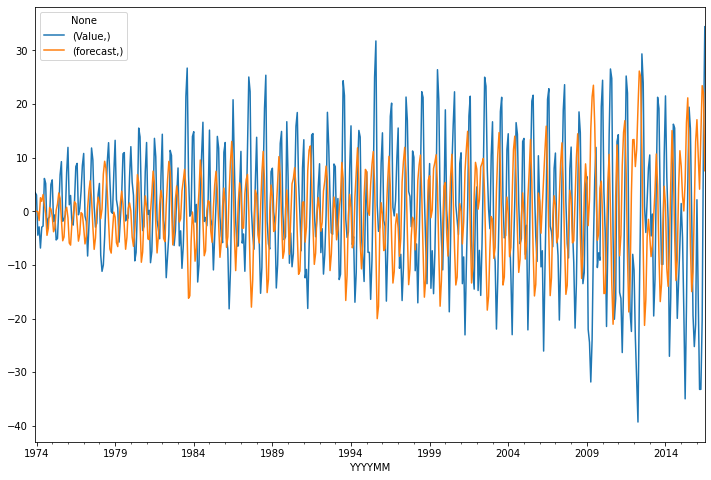

In [169]:

df_ma["forecast"]= model_arima.predict()
df_ma[["Value","forecast"]].plot(figsize=(12,8))

### 8.1 Evaluation- ARIMA Model


In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("The MSE for ARIMA Model;-\n", mean_squared_error(df_ma["Value"], df_ma["forecast"]))

The MSE for ARIMA Model;-
 219.33569012057382


##### Definately since the data is seasonal, so we need to use SARIMAX Techniques. That is the reason we are getting the very high error.

## 9  SARIMAX Model

### 9.1 Grid Search - To find the optimal p,d,q value

- Finding the optimal paramter(p,d,q) for ARIMA Model is not trivial and it can be very time consuming as well.Therefore we will be selecting the optimal parameter using grid search hyper parameter tuning. 
- For each value of optimal paramter, we will be fitting it into the SARIMAX model from statsmodel and evaluate the overall performance.

In [173]:
#TO Calculate all combination
import itertools 
p = d = q = range(0, 3)  # Define the p, d and q parameters to take any value between 0 and 2

#To randomly take all different parameters
pdq = list(itertools.product(p, d, q)) 

pdq_season = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets

print('Examples of Seasonal ARIMA parameter combinations for ARIMA and Seasonal ARIMA...')

print('SARIMAX Best parameters are: {} x {}'.format(pdq[1], pdq_season[1]))

print('SARIMAX Best parameters are:: {} x {}'.format(pdq[2], pdq_season[2]))

Examples of Seasonal ARIMA parameter combinations for ARIMA and Seasonal ARIMA...
SARIMAX Best parameters are: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX Best parameters are:: (0, 0, 2) x (0, 0, 2, 12)


In [174]:
from statsmodels.tsa.statespace import sarimax


In [175]:
from statsmodels.tsa.statespace import sarimax
models=sarimax.SARIMAX(df_ma["Value"], order=(2,1,2), seasonal_order=(2,1,2,12))
sar_mod= models.fit()
df_ma["SARIMAX_predict"]=  sar_mod.predict()                     
print("The predicted output is:- \n",df_ma["SARIMAX_predict"] )


C:\Users\Sonal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sonal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


The predicted output is:- 
            SARIMAX_predict
YYYYMM                    
1974-01-01        0.000000
1974-02-01        3.027906
1974-03-01       -4.466955
1974-04-01       -2.913235
1974-05-01       -6.863379
...                    ...
2016-03-01      -20.312588
2016-04-01      -40.810539
2016-05-01      -17.686666
2016-06-01        1.526656
2016-07-01       27.931112

[511 rows x 1 columns]


In [177]:
print("The MSE for SARIMAX model is:-\n", mean_squared_error(df_ma["Value"], df_ma["SARIMAX_predict"]))
print(sar_mod.summary())

The MSE for SARIMAX model is:-
 18.048589355961727
                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  511
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1431.420
Date:                            Wed, 16 Feb 2022   AIC                           2880.841
Time:                                    21:20:04   BIC                           2918.736
Sample:                                01-01-1974   HQIC                          2895.713
                                     - 07-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3333      0.290     -1.148      0.251      -0.

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

count    511.000000
mean      -0.247070
std        4.245329
min      -16.324755
25%       -2.660952
50%       -0.354185
75%        2.291829
max       12.334927
dtype: float64


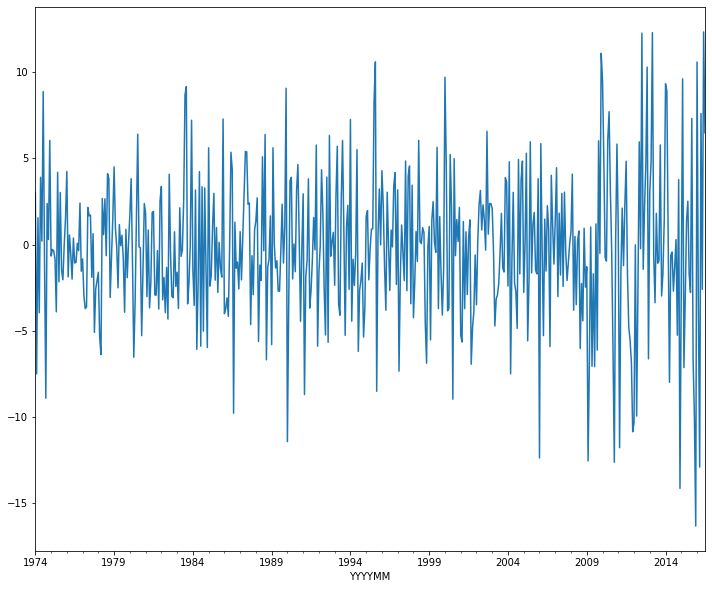

In [178]:
#plotting residual plot
sar_mod.resid.plot(figsize=(12,10))
print(sar_mod.resid.describe())

The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

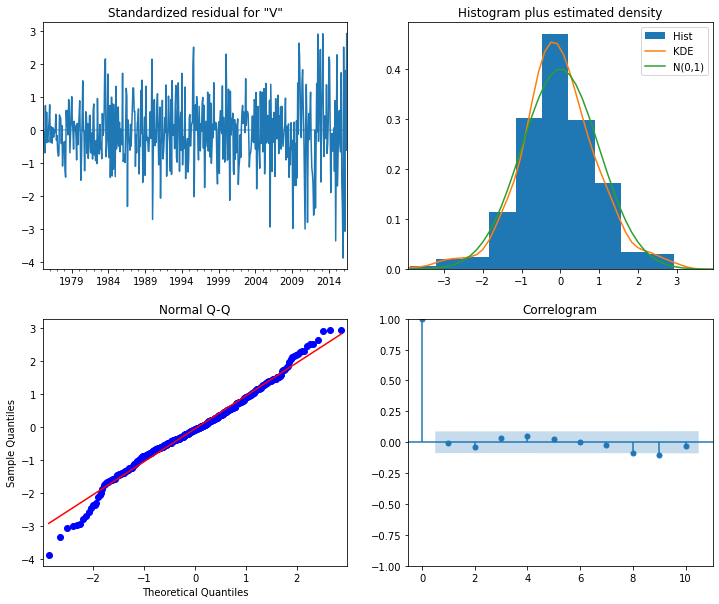

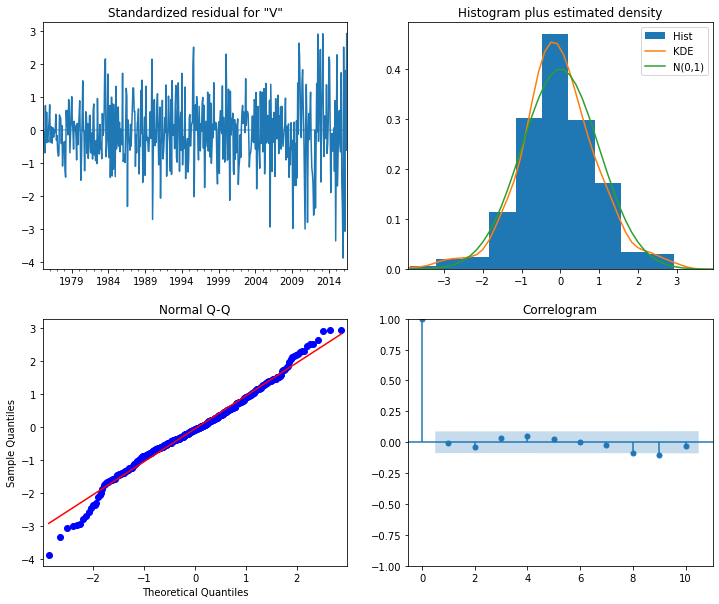

In [179]:
sar_mod.plot_diagnostics(figsize=(12,10))

#### Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

The model diagnostic suggests that the model residual is normally distributed based on the following:

- In the top right plot, the orange KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

## 9.2 Validation Prediction

- Till now we have successfully built a time series model that can forecase the model. We will start comparing the predicted output the realtime which will help us understand the accuracy of the time series model.

In [180]:
pred= sar_mod.get_prediction(start=480, end=513, dynamic=False)
pred_ci= pred.conf_int()
pred_ci.head()

,lower Value,upper Value
2014-01-01,3.931567,20.430335
2014-02-01,-10.861621,5.637113
2014-03-01,-10.045252,6.453449
2014-04-01,-27.308592,-10.809924
2014-05-01,-23.724495,-7.225859


The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

- We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

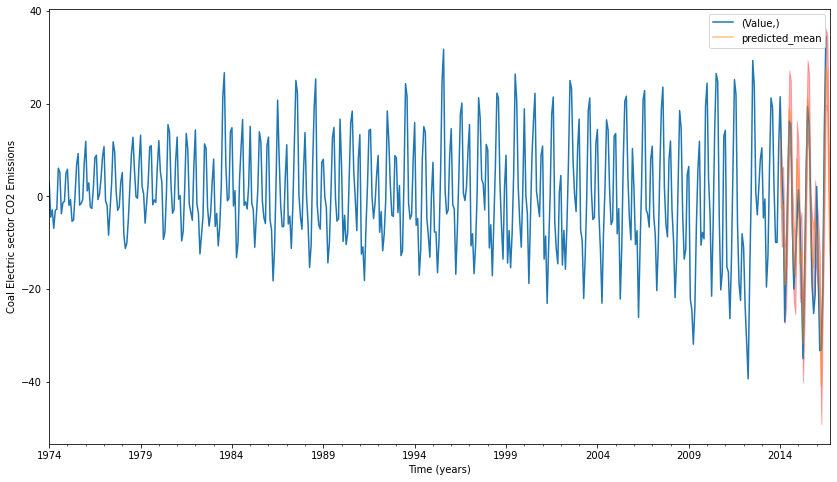

In [181]:
ax= df_ma[["Value"]]['1973':].plot(label="observed")
pred.predicted_mean.plot(figsize=(14,8), alpha=0.5)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color="red", alpha=0.3)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Coal Electric sector CO2 Emissions')
plt.legend()

Overall, our forecasts align with the true values very well, showing an overall similar behavior.

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out.

##### Computing the Mean Squared Error

In [184]:
y_act= df_ma["Value"]['2013-12-01':]
y_pred= pred.predicted_mean


a= pd.DataFrame(pd.concat([y_act, y_pred], axis=1))
a.isnull().sum()
a.dropna(inplace=True)

a.columns= ["y_act", "y_pred"]
#MSE 
mse= mean_squared_error(a["y_act"], a["y_pred"])
print("The mean squared error for the forecast model is--{}".format(round(mse,2)))


The mean squared error for the forecast model is--53.94


## 10. Forecasting

In [185]:
#we are going to predict the next 10 years forecasting ie 120 months
forecast= sar_mod.get_forecast(steps=120)

#Getting the confidence interval
forecast_ci= forecast.conf_int()
forecast_ci.head()

,lower Value,upper Value
2016-08-01,18.307077,34.804886
2016-09-01,-8.078187,11.251735
2016-10-01,-22.712705,-2.372294
2016-11-01,-24.064902,-3.365743
2016-12-01,-11.243999,9.604277


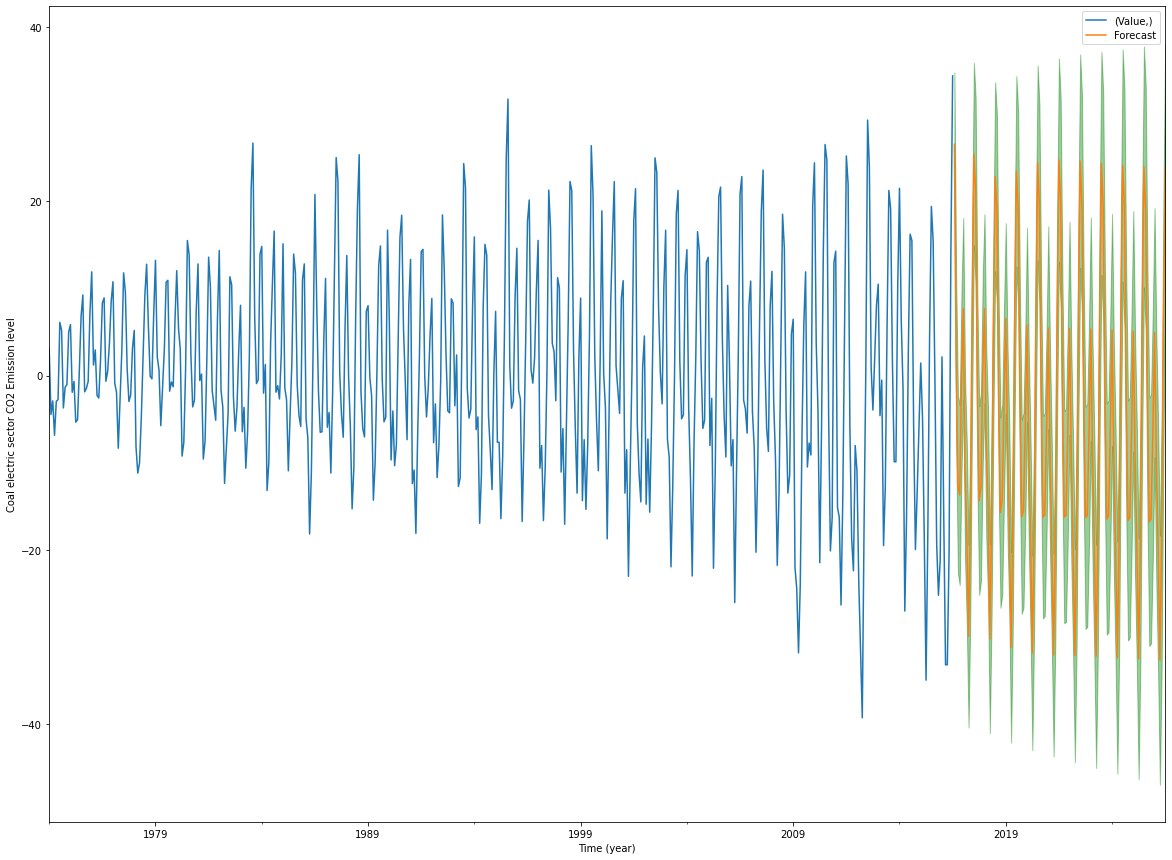

In [186]:
ax = df_ma["Value"].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Coal electric sector CO2 Emission level')

plt.legend()
plt.show()

Both the forecast and associated confidence interval that we have generated can now be used to further analysis and understand the time series. The forecast shows that the CO2 emission from Coal electric power generation is expected to stable.

# 11 Conclusion

- In this notebook, I have explored how to retrieve CSV dataset, how to transform the dataset into times series, testing if the time series is stationary or not using graphical and Dickey-Fuller test statistic methods, how to transform time series to stationary, how to find optimal parameters to build SARIMA model using grid search method, diagnosing time series prediction, validating the predictive power, forecasting 10 year future CO2 emission from power generation using coal electric power generator.